Paste your data directory and copy it relative path to the FILE_PATH variable

In [ ]:
from utils.attention import AttentionLayer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Input, Dense,Embedding, Concatenate, TimeDistributed
from tensorflow.keras.models import Model,load_model, model_from_json
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
import pickle as pkl
import numpy as np

In [ ]:
# Constant variables

NUMBER_OF_DATASET = 5000
EPOCHS = 50
FILE_PATH = '/content/drive/My Drive/Dataset/Machine Translation/Final Year/data/eng-twi.txt'

In [ ]:
lines= pd.read_table(FILE_PATH, names=['source', 'target'])

In [ ]:
print(lines.target[:5])


0        Persecution at School
1         Underground Activity
2    I was put in the middle .
3         Never be obstinate .
4       I began to cry again .
Name: target, dtype: object


In [ ]:
len(lines.source), len(lines.target)


(65585, 65585)

In [ ]:
language_data = pd.DataFrame(columns=['Source','Target'])
language_data['Source'] = lines.source[:NUMBER_OF_DATASET]
language_data['Target'] = lines.target[:NUMBER_OF_DATASET]

In [ ]:
language_data.to_csv('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/language_data.csv', index=False)


In [ ]:
language_data = pd.read_csv('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/language_data.csv')


In [ ]:
language_data.head()


,Source,Target
0,Sukuu Ɔtae,Persecution at School
1,Esum Ase Adwumayɛ,Underground Activity
2,Wɔde me kogyinaa mfinimfini .,I was put in the middle .
3,Nsene wo kɔn da .,Never be obstinate .
4,Mifii ase sui bio .,I began to cry again .


In [ ]:
source_text = language_data['Source'].values
target_text = language_data['Target'].values

In [ ]:
source_text[0], target_text[0]


('Sukuu Ɔtae', 'Persecution at School')

In [ ]:
len(source_text), len(target_text)


(5000, 5000)

In [ ]:
source_text_ = [re.sub("'",'',str(x)) for x in source_text]
target_text_ = [re.sub("'",'',str(x)) for x in target_text]

In [ ]:
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

source_text_ = remove_punc(source_text_)
target_text_ = remove_punc(target_text_)

In [ ]:

# removing the stating and ending whitespaces
source_text_ = [x.strip() for x in source_text_]
target_text_ = [x.strip() for x in target_text_]

In [ ]:
# removing the starting and ending whitespaces
source_text_ = [x.strip() for x in source_text_]
target_text_ = [x.strip() for x in target_text_]

In [ ]:
# Putting the start and end words in the sentances
target_text_ = ["start " + x + " end" for x in target_text_]

In [ ]:

target_text_[0], source_text_[0]

('start Persecution at School end', 'Sukuu Ɔtae')

In [ ]:

target_text_[0], source_text_[0]

('start Persecution at School end', 'Sukuu Ɔtae')

In [ ]:

X = source_text_
Y = target_text_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
len(X_train),len(y_train), len(X_test), len(y_test)

(4500, 4500, 500, 500)

In [ ]:

X_train[0], y_train[0]

('Karkwan So Abufuw a Wobɛkwati', 'start Avoiding Road Rage end')

In [ ]:

def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_length_source = Max_length(X_train)
max_length_target = Max_length(y_train)

#Test data
max_length_source_test = Max_length(X_test)
max_length_target_test = Max_length(y_test)

In [ ]:
max_length_target, max_length_source


(10, 19)

In [ ]:
sourceTokenizer = Tokenizer()
sourceTokenizer.fit_on_texts(X_train)
Sword2index = sourceTokenizer.word_index
vocab_size_source = len(Sword2index) + 1

X_train = sourceTokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length_source, padding='post')

X_test = sourceTokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_length_source, padding='post')


In [ ]:
targetTokenizer = Tokenizer()
targetTokenizer.fit_on_texts(y_train)
Tword2index = targetTokenizer.word_index
vocab_size_target = len(Tword2index) + 1

y_train = targetTokenizer.texts_to_sequences(y_train)
y_train = pad_sequences(y_train, maxlen=max_length_target, padding='post')

y_test = targetTokenizer.texts_to_sequences(y_test)
y_test = pad_sequences(y_test, maxlen = max_length_target, padding='post')


In [ ]:
vocab_size_source, vocab_size_target

(2790, 3085)

In [ ]:
with open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/NMT_data.pkl','wb') as f:
  pkl.dump([X_train, y_train, X_test, y_test],f)


In [ ]:
with open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/NMT_Stokenizer.pkl','wb') as f:
  pkl.dump([vocab_size_source, Sword2index, sourceTokenizer], f)

with open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/NMT_Ttokenizer.pkl', 'wb') as f:
  pkl.dump([vocab_size_target, Tword2index, targetTokenizer], f)

In [ ]:
X_train[0], y_train[0]

(array([1147,   11,  236,    1,  742,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([   2, 1075,  349,  350,    1,    0,    0,    0,    0,    0],
       dtype=int32))

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train[0], y_train[0]

(array([1147,   11,  236,    1,  742,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([   2, 1075,  349,  350,    1,    0,    0,    0,    0,    0],
       dtype=int32))

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_length_source,)) 
enc_emb = Embedding(vocab_size_source, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(vocab_size_target, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(vocab_size_target, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 19)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 19, 500)      1395000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 19, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1],1)[:,1:], 
                    epochs=EPOCHS, 
                    batch_size=512,
                    validation_data = ([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/15
9/9 [==============================] - 6s 620ms/step - loss: 4.3188 - accuracy: 0.4408 - val_loss: 2.0249 - val_accuracy: 0.6431
Epoch 2/15
9/9 [==============================] - 4s 413ms/step - loss: 2.5084 - accuracy: 0.5975 - val_loss: 1.9372 - val_accuracy: 0.6562
Epoch 3/15
9/9 [==============================] - 4s 412ms/step - loss: 2.3775 - accuracy: 0.6266 - val_loss: 1.8015 - val_accuracy: 0.7142
Epoch 4/15
9/9 [==============================] - 4s 416ms/step - loss: 2.2749 - accuracy: 0.6579 - val_loss: 1.7337 - val_accuracy: 0.7364
Epoch 5/15
9/9 [==============================] - 4s 413ms/step - loss: 2.1573 - accuracy: 0.6947 - val_loss: 1.6351 - val_accuracy: 0.7464
Epoch 6/15
9/9 [==============================] - 4s 419ms/step - loss: 2.0628 - accuracy: 0.6979 - val_loss: 1.6701 - val_accuracy: 0.7447
Epoch 7/15
9/9 [==============================] - 4s 421ms/step - loss: 1.9454 - accuracy: 0.7115 - val_loss: 1.4978 - val_accuracy: 0.7562
Epoch 8/15
9/9 [====

In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/Dataset/Machine Translation/Final Year/models/NMT_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Dataset/Machine Translation/Final Year/models/NMT_model_weight.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# loading the model architecture and asigning the weights
json_file = open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/models/NMT_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json, custom_objects={'AttentionLayer': AttentionLayer})
# load weights into new model
model_loaded.load_weights("/content/drive/My Drive/Dataset/Machine Translation/Final Year/models/NMT_model_weight.h5")

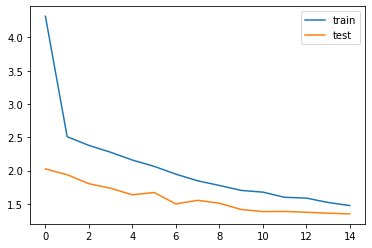

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:
with open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/NMT_Stokenizer.pkl','rb') as f:
  vocab_size_source, Sword2index, sourceTokenizer = pkl.load(f)

with open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/NMT_Ttokenizer.pkl', 'rb') as f:
  vocab_size_target, Tword2index, targetTokenizer = pkl.load(f)

with open('/content/drive/My Drive/Dataset/Machine Translation/Final Year/processed_data/NMT_data.pkl','rb') as f:
  X_train, y_train, X_test, y_test = pkl.load(f)

In [ ]:
# Sword2index = sourceTokenizer.index_word
# Tword2index = targetTokenizer.index_word

In [ ]:
Sindex2word = sourceTokenizer.index_word
Tindex2word = targetTokenizer.index_word

In [ ]:
model_loaded.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 19)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 19, 500)      1395000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 19, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [ ]:
latent_dim=500
# encoder inference
encoder_inputs = model_loaded.input[0]  #loading encoder_inputs
encoder_outputs, state_h, state_c = model_loaded.layers[6].output #loading encoder_outputs

print(encoder_outputs.shape)

encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(32,latent_dim))

# Get the embeddings of the decoder sequence
decoder_inputs = model_loaded.layers[3].output

print(decoder_inputs.shape)
dec_emb_layer = model_loaded.layers[5]

dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_lstm = model_loaded.layers[7]
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_layer = model_loaded.layers[8]
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])

concate = model_loaded.layers[9]
decoder_inf_concat = concate([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_dense = model_loaded.layers[10]
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

(None, 19, 500)
(None, None)


In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = Tword2index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
          break
        else:
          sampled_token = Tindex2word[sampled_token_index]

          if(sampled_token!='end'):
              decoded_sentence += ' '+sampled_token

              # Exit condition: either hit max length or find stop word.
              if (sampled_token == 'end' or len(decoded_sentence.split()) >= (26-1)):
                  stop_condition = True

          # Update the target sequence (of length 1).
          target_seq = np.zeros((1,1))
          target_seq[0, 0] = sampled_token_index

          # Update internal states
          e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=Tword2index['start']) and i!=Tword2index['end']):
        newString=newString+Tindex2word[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+Sindex2word[i]+' '
    return newString

In [ ]:
for i in range(10):
  
  print("Review:",seq2text(X_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  print("Predicted summary:",decode_sequence(X_test[i].reshape(1,19)))
  print("\n")

Review: ano aduru ankasa 
Original summary: the solution at last 
Predicted summary:  the about of a


Review: efi nyan 
Original summary: by awake 
Predicted summary:  picture on page 5


Review: anigyede a wɔhwehwɛ 
Original summary: in of 
Predicted summary:  a a a a a family


Review: pɛ nea wode w’ani 
Original summary: take up a 
Predicted summary:  a a a a readers


Review: efi nyan 
Original summary: by awake 
Predicted summary:  picture on page 5


Review: ɔhaw no a wosiw ano 
Original summary: the cycle 
Predicted summary:  a about of readers


Review: awofo a wonni 
Original summary: parents 
Predicted summary:  the was a a it


Review: kratafa 7 mfonini ahorow 
Original summary: pictures on page 7 
Predicted summary:  picture on page 5


Review: mfiase pa 
Original summary: it began so well 
Predicted summary:  a a a a family


Review: dɛn nti na ɛsɛ sɛ wɔkae 
Original summary: why remember 
Predicted summary:  the bible’s viewpoint


